<a href="https://colab.research.google.com/github/jurados/NotesPytorch/blob/main/Dense_Connected_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

# Redes Neuronales Densamente Conectadas

**Training:** Se crea o se *aprende* del modelo, a partir de las muestras de entrada que se tienen etiquetadas.

**Inference:** Proceso de hacer predicciones mediante la aplicación del modelo ya entrando a muestra de las que no se dispone de etiqueta y que se quiere predecir

$$y = wx+b$$

donde
- $y$ es la etiqueta de una muestra de entrada
- $x$ representa las característica de la muestra
- $w$ es la pendiente de la recta  y  que se llama weight y es uno de los dos parámetros que tendrá que aprender el modelo durante el proceso de entramiento para poder usarlo lueo para la inferencia.
- $b$ es lo que se llama *bias*. Otro de los parámetros que deben ser aprendidos por el modelo.

De manera general:

$$y = \sum_i w_i x_i + b = \mathbf{w}^{T}\mathbf{X} + b$$

os algoritmos de regresión modelan la relación entre las distintas features utilzando una media de error, la loss que se intentará minimizar en un proceso iterativo para poder realizar predicciones.

La regresión logística da una salida discreta y la regresión líneal da como salida continua.

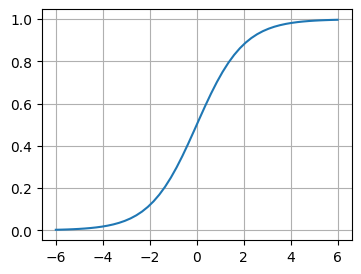

In [ ]:
z = np.linspace(-6,6)
y = 1/(1+np.exp(-z))
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(z,y)
ax.grid(True)

## Redes Neuronales

### Perceptron

Es un algoritmo de __clasificación__, también es referenciada en la literatura como _linear threshold unit_ (LTU). Las entradas y salidas ahora son números y cada conexión de entrada está asociada con un _weight_; luego, se aplica una funciín de activación.

### Perceptrón Multicapa

Una red neural compuesta por varios perceptrones.

Cuando todas las neuronas de una capa están conectadas a todas las neuronas de la capa anterior, la capa se denomina capa completamente conectada o capa densa.

En la literatura se refiere a un perceptrón multicapa, o _Multi-Layer Perceptron_  (MLP), cuando nos encontramos con redes neuronales que tiene una capa de entrada (_input layer_), una o más capas compuestas por perceptrones llamdas capas ocultas (_hidden layers_), y una capa final con varios perceptrones llamada la capa de salida (_output layer_).





Se refiere a _Deep Learning_ cuando el modelo basado en redes neuronales está compuesto por múltiples capas ocultas.

Cuando queremos clasificar con más de dos clases y, en concreto, cuando las clases son exclusivas, debemos usar la función de activación _softmax_ que nos garantiza quet odas las probabilidad estimadas son entre 0 y 1 y que suman 1.

## _Softmax_

Se basa en calcular las __evidencias__ de que una determinada imagen pertenece a una clase en particular, y luego se convierten estas evidencias en probabilidad de que pertenezca a cada una de las posibles clases.

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


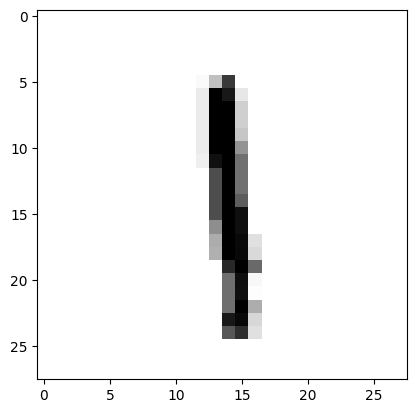

In [ ]:
plt.imshow(x_train[8], cmap=plt.cm.binary)

In [ ]:
np.set_printoptions(precision=2, suppress=True, linewidth=120)
print(np.matrix(x_train[8]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5  63 197   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 230  24   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 254  48   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 255  48   0   0   0   

_softmax_ usa el valor exponencial de las evidencias calculadas y, luego, las normaliza de mode que sumen uno, formando una distribución de probabilidad. La probabilidad de pertenencia a la clase $i$ es:

$$\text{softmax}_i = \frac{e^{\text{evidencia}_i}}{\displaystyle{\sum_j e^{\text{evidencia}_j}}}$$

Se consigue que la unidad más de evidencia tiene un efecto multiplicador y una unidad menos tiene el efecto invero.

In [ ]:
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='softmax', name="FC1", input_shape=(784,))
])
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)

model.evaluate(x_test,  y_test, verbose=2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FC1 (Dense)                 (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4680 - accuracy: 0.8787
313/313 - 1s - loss: 0.3135 - accuracy: 0.9144 - 558ms/epoch - 2ms/step


[0.3134835958480835, 0.9143999814987183]

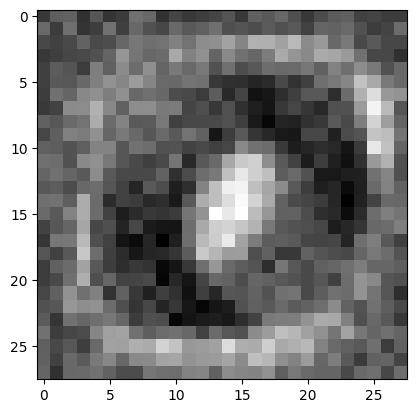

In [ ]:
w = model.get_weights()
w = np.asarray(w[0])
plt.figure()
plt.imshow(w[:,0].reshape([28,28]), cmap=plt.get_cmap('binary'))

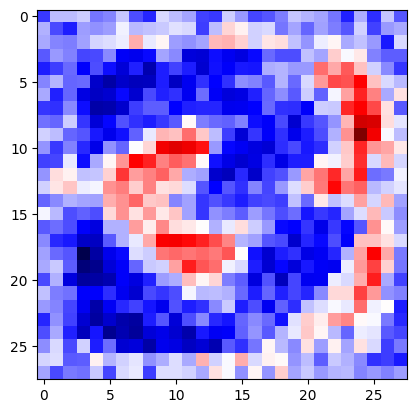

In [ ]:
w = model.get_weights()
w = np.asarray(w[0])
plt.figure()
plt.imshow(w[:,3].reshape([28,28]), cmap=plt.get_cmap('seismic_r'))